# Task 4 - Proxy Target Variable Engineering 
The goal of this task is to create High-risk groups are those with high likelihood of default - those who do not pay the loan principal and interest in the specified time frame.


In [1]:
# Depencies
import pandas as pd
import numpy as np
import os
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
 # Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
from src.rfm_clustering import RFMClustering

In [3]:
#Load dataset
df=pd.read_csv('F:/Credit-Risk-Model/data/raw/data.csv')
# display few rows of the dataset
print("Dataset loaded successfully. Displaying first few rows:")
df.head()

Dataset loaded successfully. Displaying first few rows:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


# Clustering and calculation of RFM 
**the calculation using Recency,Frequency and Monetary**

In [4]:
# Import necessary libraries
# Load your dataset (replace 'your_data.csv' with your actual file path)
# Select only the necessary columns
df_subset = df[['CustomerId', 'Amount', 'TransactionStartTime']]

# Initialize RFMClustering
rfm_cluster = RFMClustering(n_clusters=3, random_state=42)

# Calculate RFM and cluster
df_with_rfm, rfm, cluster_summary = rfm_cluster.calculate_rfm_and_cluster(
    df_subset,
    group_by_col='CustomerId',
    amount_col='Amount',
    datetime_col='TransactionStartTime'
)

# Display results
print("Dataset with is_high_risk (head):")
print(df_with_rfm.head())
print("\nRFM Data (head):")
print(rfm.head())
print("\nCluster Summary:")
print(cluster_summary)

# Optionally save results
df_with_rfm.to_csv('F:/Credit-Risk-Model/data/processed/data_with_rfm.csv', index=False)
rfm.to_csv('F:/Credit-Risk-Model/data/processedrfm_data.csv', index=False)
cluster_summary.to_csv('F:/Credit-Risk-Model/data/processedcluster_summary.csv', index=False)
print("\nSaved: data_with_rfm.csv, rfm_data.csv, cluster_summary.csv")

Dataset with is_high_risk (head):
        CustomerId   Amount  TransactionStartTime  is_high_risk
0  CustomerId_4406   1000.0  2018-11-15T02:18:49Z             0
1  CustomerId_4406    -20.0  2018-11-15T02:19:08Z             0
2  CustomerId_4683    500.0  2018-11-15T02:44:21Z             1
3   CustomerId_988  20000.0  2018-11-15T03:32:55Z             0
4   CustomerId_988   -644.0  2018-11-15T03:34:21Z             0

RFM Data (head):
        CustomerId  Recency  Frequency  Monetary  Cluster  is_high_risk
0     CustomerId_1       84          1  0.000000        2             0
1    CustomerId_10       84          1  0.000000        2             0
2  CustomerId_1001       90          5  9.903538        0             1
3  CustomerId_1002       26         11  8.349011        1             0
4  CustomerId_1003       12          6  9.903538        1             0

Cluster Summary:
   Cluster    Recency  Frequency   Monetary  CustomerCount
0        0  59.368017   6.975559   8.996050           1

# Integration or adding of high-Risk column to Transformed data and prepare for Model Training 

In [12]:
# Integration with transformed data(F:/Credit-Risk-Model/data/processed/transformed_data.csv)
transformed_data = pd.read_csv('F:/Credit-Risk-Model/data/processed/transformed_data.csv')
# add  columns of Recency  Frequency  Monetary  Cluster  is_high_risk from  RFM data  to transformed data
transformed_data[['Recency', 'Frequency', 'Monetary', 'Cluster', 'is_high_risk']] = rfm[['Recency', 'Frequency', 'Monetary', 'Cluster', 'is_high_risk']]
transformed_data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,ChannelId,Amount,...,total_amount_y,avg_amount_y,trans_count_y,std_amount_y,FraudResult,Recency,Frequency,Monetary,Cluster,is_high_risk
0,1.097926,-0.015563,0.153713,1.668646,0.595070,0.0,1.025848,-1.578054,0.746738,-0.046371,...,-0.314303,-0.067623,-0.311831,-0.167016,0,84.0,1.0,0.000000,2.0,0.0
1,1.013589,-0.571733,0.867190,0.346449,0.595070,0.0,-0.502027,0.916063,-1.175144,-0.054643,...,-0.314303,-0.067623,-0.311831,-0.167016,0,84.0,1.0,0.000000,2.0,0.0
2,-0.287613,0.469994,0.371965,-1.203089,0.807169,0.0,1.025848,-1.716616,0.746738,-0.050426,...,-0.450490,-0.072568,-0.444993,-0.201209,0,90.0,5.0,9.903538,0.0,1.0
3,0.032862,-1.666100,0.996380,-1.227972,1.692827,0.0,-2.793841,-0.192433,0.746738,0.107717,...,-0.408360,-0.008155,-0.404020,-0.008243,0,26.0,11.0,8.349011,1.0,0.0
4,-0.234164,0.056072,0.867190,0.346449,1.692827,0.0,-0.502027,0.916063,-1.175144,-0.059704,...,-0.408360,-0.008155,-0.404020,-0.008243,0,12.0,6.0,9.903538,1.0,0.0


## save the Tansformed for the model traning 

In [13]:
# to save the transformed data with RFM features
transformed_data.to_csv('F:/Credit-Risk-Model/data/processed/Transformedfinal_data.csv', index=False)
print("\nSaved: transformedfinal_data.csv")


Saved: transformedfinal_data.csv


## scatter plot of Recency vs Frequency colored by Cluster

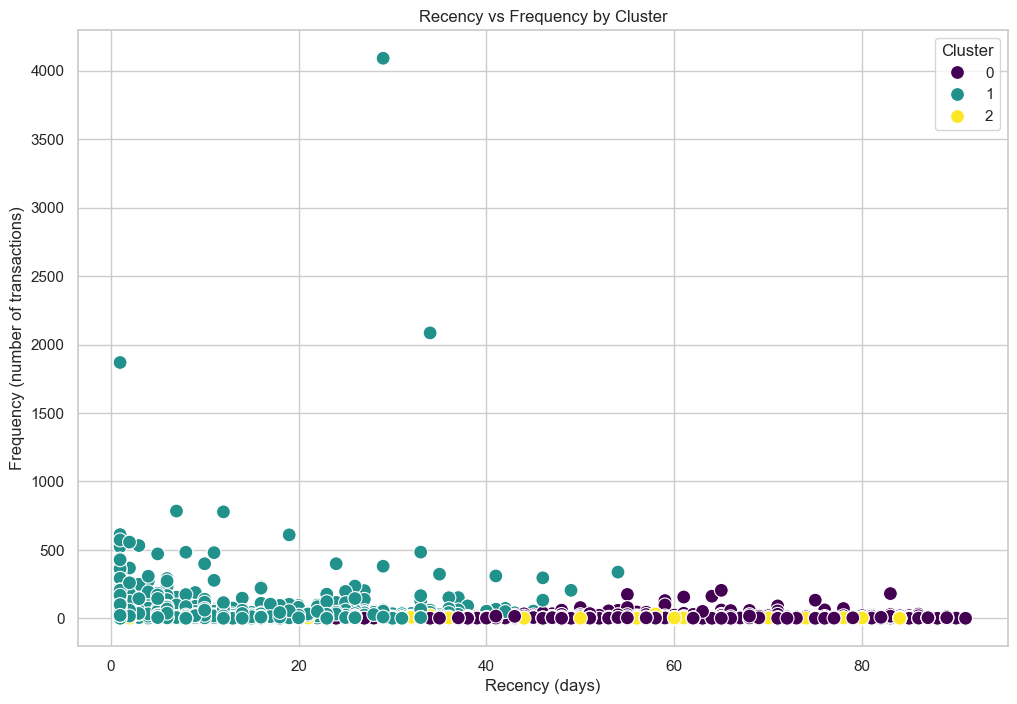

In [14]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style for seaborn
sns.set(style="whitegrid")
# Create a scatter plot of Recency vs Frequency colored by Cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Cluster', palette='viridis', s=100)
plt.title('Recency vs Frequency by Cluster')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency (number of transactions)')
plt.legend(title='Cluster')
plt.show()


## scatter plot of Recency vs Monetary colored by Cluster

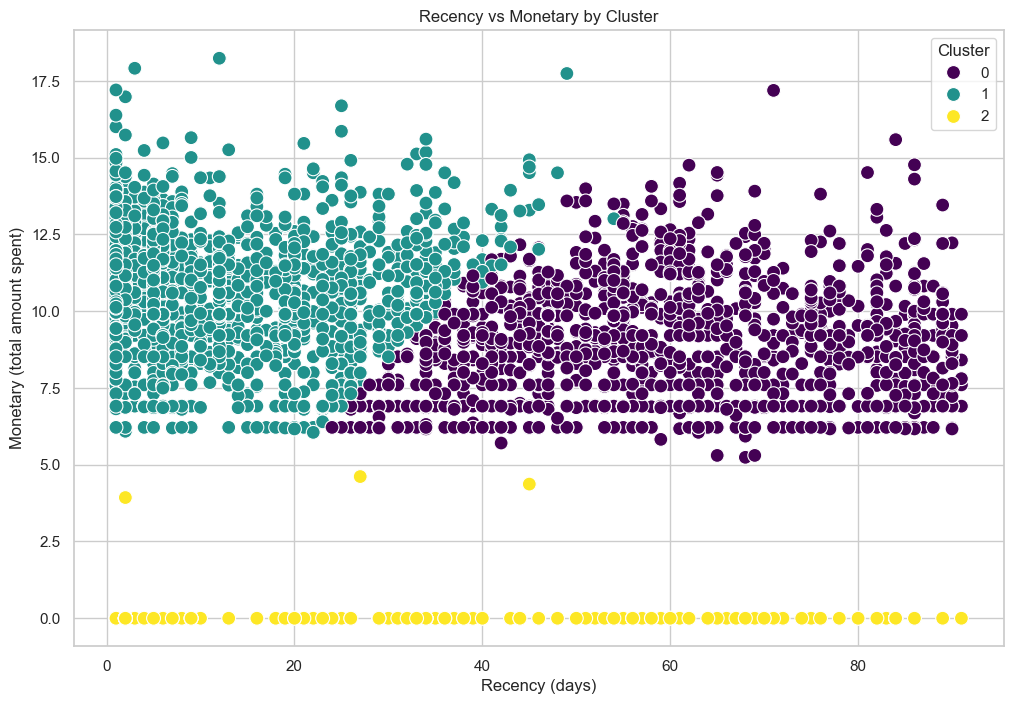

In [15]:
### Create a scatter plot of Recency vs Monetary colored by Cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='viridis', s=100)
plt.title('Recency vs Monetary by Cluster')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary (total amount spent)')
plt.legend(title='Cluster')
plt.show()



C:\Users\user\AppData\Local\Temp\ipykernel_292996\2720953059.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='is_high_risk', palette='Set2')


<Figure size 1200x600 with 0 Axes>

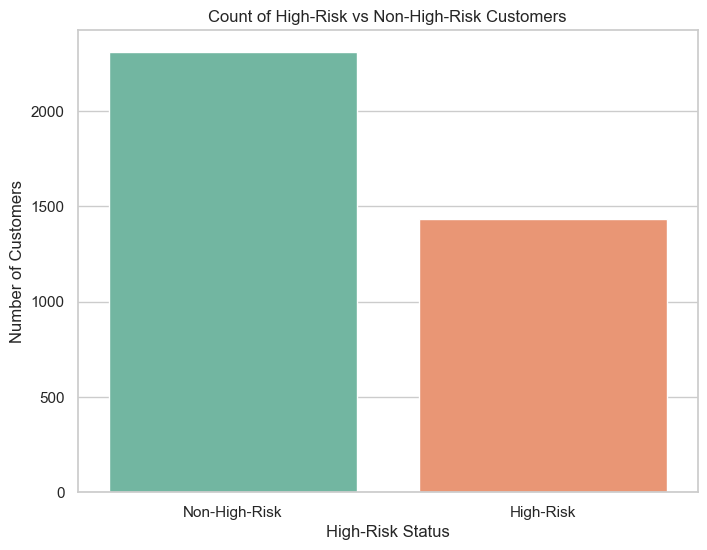

In [16]:
# is_high_risk vs customerid
plt.figure(figsize=(12, 6))
plt.figure(figsize=(8, 6))
sns.countplot(data=rfm, x='is_high_risk', palette='Set2')
plt.title('Count of High-Risk vs Non-High-Risk Customers')
plt.xlabel('High-Risk Status')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0, 1], labels=['Non-High-Risk', 'High-Risk'])
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_292996\4203828374.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='is_high_risk', palette='Set2')


<Figure size 1200x600 with 0 Axes>

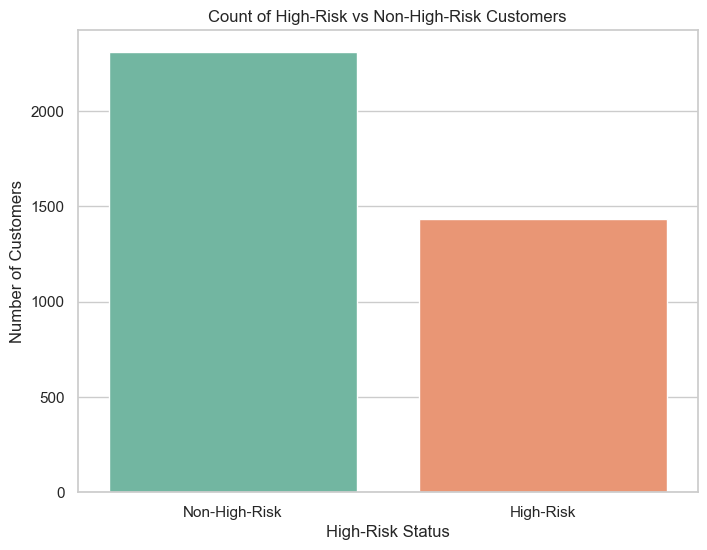

In [17]:
#  is_high_risk vs CostomerId
plt.figure(figsize=(12, 6))
plt.figure(figsize=(8, 6))
sns.countplot(data=rfm, x='is_high_risk', palette='Set2')
plt.title('Count of High-Risk vs Non-High-Risk Customers')
plt.xlabel('High-Risk Status')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0, 1], labels=['Non-High-Risk', 'High-Risk'])
plt.show()
